In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = yf.download('SPY', start='2015-01-01', end='2025-01-01')
data.head()

/var/folders/87/5qsbfgw96kdgbxfk43_9j9500000gn/T/ipykernel_59516/3162949895.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('SPY', start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2015-01-02,171.093674,172.301326,170.052603,171.884897,121465900
2015-01-05,168.003769,170.210833,167.695616,170.044264,169632600
2015-01-06,166.421356,168.836634,165.621809,168.311931,209151400
2015-01-07,168.495148,168.836622,167.304169,167.753906,125346700
2015-01-08,171.485138,171.701689,169.894392,169.911040,147217800


In [16]:
data['MA20'] = data['Close'].rolling(20).mean()
data['MA50'] = data['Close'].rolling(50).mean()

In [17]:
data['Signal'] = 0
data.loc[data['MA20'] > data['MA50'], 'Signal'] = 1
data.loc[data['MA20'] < data['MA50'], 'Signal'] = -1

In [18]:
data['Returns'] = data['Close'].pct_change()
data['Strategy'] = data['Signal'].shift(1) * data['Returns']

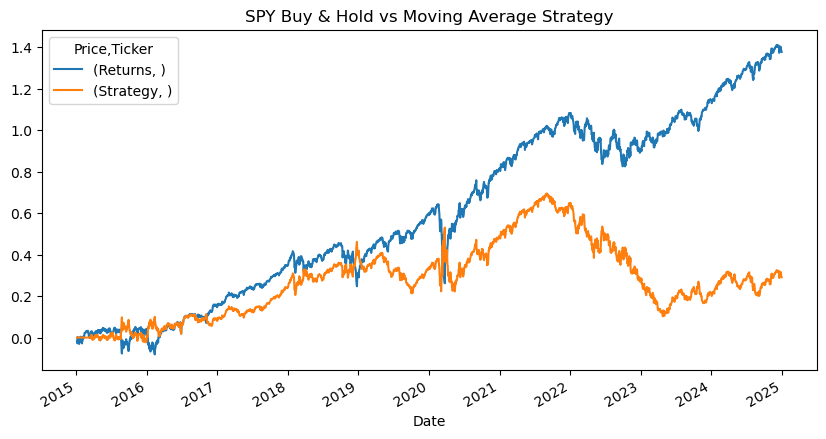

In [19]:
data[['Returns','Strategy']].cumsum().plot(figsize=(10,5))
plt.title('SPY Buy & Hold vs Moving Average Strategy')
plt.show()

In [20]:
sharpe = (data['Strategy'].mean() / data['Strategy'].std()) * (252**0.5)
print("Sharpe Ratio:", sharpe)

Sharpe Ratio: 0.1665378599640318


In [21]:
data['Strategy_net'] = data['Strategy'] - 0.001 * abs(data['Signal'].diff())

In [24]:
print("Strategy Total Return:", data['Strategy'].cumsum().iloc[-1])
print("Buy & Hold Total Return:", data['Returns'].cumsum().iloc[-1])

Strategy Total Return: 0.291333918749366
Buy & Hold Total Return: 1.3783646314514142
